# Deep Learning Models

A collection of deep learning models implemented on Pytorch for training purposes.

Author: Lucas Martinuzzo Batista<br>
GitHub: https://github.com/LucasMartinuzzo/Deep-Learning-Models

## Rosenblatt's Perceptron

Implementation of Frank Rosenblatt's Perceptron for binary classification.

In [1]:
import torch 
import torch.nn as nn
import torchvision.transforms as transforms
from torch.utils.data import Dataset, DataLoader
import matplotlib.pylab as plt
import numpy as np
import os

In [2]:
device = "cpu"
if torch.cuda.is_available():
  print("Cuda is Available!")
  device = torch.device("cuda:0")

Cuda is Available!


In [3]:
data = np.genfromtxt("../../data/perceptron_toy_data.csv",delimiter = "\t")
np.random.shuffle(data)

In [4]:
X = np.array(data[:,:2]).astype(float)
y = np.array(data[:,2]).astype(int)
size = y.shape[0]

In [5]:
train_size = int(0.7*size)

In [6]:
print("X shape:",X.shape)
print("y shape:",y.shape)
print("Class count:",np.bincount(y))

X shape: (100, 2)
y shape: (100,)
Class count: [50 50]


In [7]:
X_train = X[:train_size]
X_test = X[train_size:]
y_train = y[:train_size]
y_test = y[train_size:]

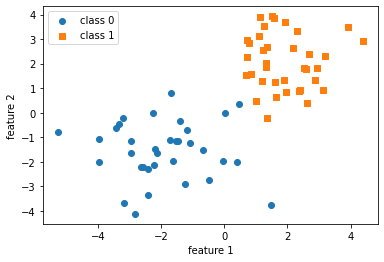

In [8]:
plt.scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
plt.scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')
plt.xlabel('feature 1')
plt.ylabel('feature 2')
plt.legend()
plt.show()

In [9]:
n_features = X.shape[1]

In [10]:
class Perceptron():
  #Constructor
  def __init__(self,n_features):
    self.weights = torch.rand(n_features,1,dtype=torch.float32,device=device)
    self.bias = torch.rand(1,dtype=torch.float32,device=device)

  def forward(self,x):
    yhat = torch.add(torch.mm(x,self.weights),self.bias).view(-1)
    return np.where(yhat.cpu().numpy()>=0,1,0)

  def backward(self,x,y):
    yhat = self.forward(x)
    return y - torch.from_numpy(yhat).to(device).view(-1)
  
  def train(self,x,y,epochs=100):
    for epoch in range(epochs):
      for i in range(y.shape[0]):
        error = self.backward(x[i].view(1,n_features),y[i])
        if error != 0:
          self.weights = torch.add(self.weights,(error*X_train_tensor[i]).view(n_features,-1))
          self.bias = torch.add(self.bias,error)
      errors = self.backward(x,y)
      if np.all(errors.cpu().numpy() == 0):
        print("Stopped at epoch:",epoch)
        break
  
  def evaluate_acc(self,x,y):
    yhat = self.forward(x)
    return np.sum(yhat == y)/(len(y))

In [11]:
X_train_tensor = torch.Tensor(X_train).to(device)
y_train_tensor = torch.Tensor(y_train).to(device)

In [12]:
y_train_tensor

tensor([0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
        0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 0., 0., 0., 0., 1., 0., 0., 0.,
        0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1., 1.,
        0., 0., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 1., 1.],
       device='cuda:0')

In [13]:
perceptron = Perceptron(n_features)
perceptron.train(X_train_tensor,y_train_tensor,10)

Stopped at epoch: 3


In [14]:
print('Model parameters:')
print('Weights: %s' % perceptron.weights)
print('Bias: %s' % perceptron.bias)

Model parameters:
Weights: tensor([[2.3621],
        [1.1046]], device='cuda:0')
Bias: tensor([-2.4072], device='cuda:0')


In [15]:
X_test_tensor = torch.Tensor(X_test).to(device)
y_test_tensor = torch.Tensor(y_test).to(device)
print("Accuracy:",perceptron.evaluate_acc(X_test_tensor,y_test))

Accuracy: 1.0


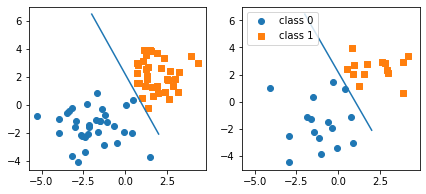

In [17]:
##########################
### 2D Decision Boundary
##########################

w, b = perceptron.weights.cpu().numpy(), perceptron.bias.cpu().numpy()

x_min = -2
y_min = ( (-(w[0] * x_min) - b[0]) 
          / w[1] )

x_max = 2
y_max = ( (-(w[0] * x_max) - b[0]) 
          / w[1] )


fig, ax = plt.subplots(1, 2, sharex=True, figsize=(7, 3))

ax[0].plot([x_min, x_max], [y_min, y_max])
ax[1].plot([x_min, x_max], [y_min, y_max])

ax[0].scatter(X_train[y_train==0, 0], X_train[y_train==0, 1], label='class 0', marker='o')
ax[0].scatter(X_train[y_train==1, 0], X_train[y_train==1, 1], label='class 1', marker='s')

ax[1].scatter(X_test[y_test==0, 0], X_test[y_test==0, 1], label='class 0', marker='o')
ax[1].scatter(X_test[y_test==1, 0], X_test[y_test==1, 1], label='class 1', marker='s')

ax[1].legend(loc='upper left')
plt.show()